### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja4.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import folium
from folium.plugins import HeatMap


In [ ]:
#Definição de cores específicas pras lojas
cor_loja1 = "#FCF434" #Amarelo
cor_loja2 = "#D3D3D3" #Branco
cor_loja3 = "#9C59D1" #Roxo
cor_loja4 = "#2C2C2C" #Preto
cores =[cor_loja1, cor_loja2 , cor_loja3, cor_loja4]

#1. Análise do faturamento
---  

 **Descobertas Principais:**

* Todas as lojas têm faturamento similar
* Priorizar análise tendências a longo prazo




Faturamento total: R$: 5,871,490.79
Faturamentos por loja: 
Loja 1 - R$ 1,534,509.12 
Loja 2 - R$ 1,488,459.06 
Loja 3 - R$ 1,464,025.03 
Loja 4 - R$ 1,384,497.58


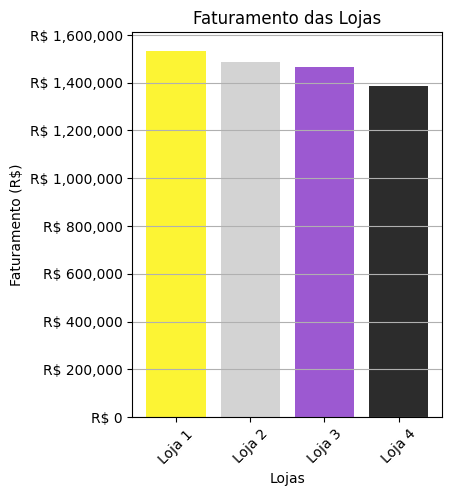

In [ ]:
import matplotlib.pyplot as plt

# Calculando o faturamento total e de cada loja
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4

#Criando listas para facilitar o agrupamento de dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

print(f"Faturamento total: R$: {faturamento_total:,.2f}\nFaturamentos por loja: \nLoja 1 - R$ {faturamento_loja1:,.2f} \nLoja 2 - R$ {faturamento_loja2:,.2f} \nLoja 3 - R$ {faturamento_loja3:,.2f} \nLoja 4 - R$ {faturamento_loja4:,.2f}")

# Criando gráfico de barras
plt.figure(figsize=(4,5))
plt.bar(lojas, faturamento, color= cores)
plt.title('Faturamento das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

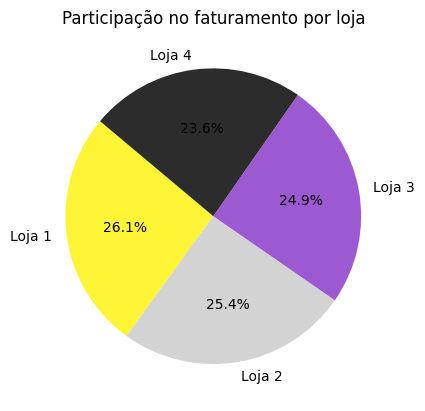

In [ ]:
#Porcentagem de cada loja no faturamento total

plt.pie(faturamento, labels=lojas, autopct="%1.1f%%", startangle=140, colors= cores)
plt.title("Participação no faturamento por loja")
plt.show()

# 2.🔍 Análise Exploratória (EDA)
---

**Loja 1**: Destaque em móveis, eletrônicos e eletrodomésticos. Performance estável. Pontos fracos em livros e artigos para casa.  

**Loja 2**: Forte em livros e instrumentos musicais. Atuação equilibrada. Possível ênfase em itens culturais.  

**Loja 3**: Melhor performance em móveis e eletrônicos. Perfil mais focado em produtos de maior valor.  

**Loja 4**: Desempenho inferior em diversas categorias, mas se sobressai em brinquedos e artigos domésticos. Pode estar direcionada a um público mais familiar e infantil.  

In [ ]:


def faturamento_por_categoria_MP(loja, nome_loja):
    """
    Função que agrupa e mostra as categorias mais populares (com base nas vendas) por loja.

    Parâmetros:
    loja (DataFrame): Dados da loja.
    nome_loja (str): Nome da loja para exibição.
    """
    quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

    quantidade_categoria = quantidade_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

    print(f'\nCategorias mais populares - {nome_loja}:')
    print(quantidade_categoria)

    #print(type(quantidade_categoria))

    return quantidade_categoria



faturamento_loja1 = faturamento_por_categoria_MP(loja1, 'Loja 1')
faturamento_loja2 = faturamento_por_categoria_MP(loja2, 'Loja 2')
faturamento_loja3 = faturamento_por_categoria_MP(loja3, 'Loja 3')
faturamento_loja4 = faturamento_por_categoria_MP(loja4, 'Loja 4')


Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   465
2            eletronicos                   448
0             brinquedos                   324
1       eletrodomesticos                   312
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
7  utilidades domesticas                   171

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade de Ven

# 3. Média de Avaliação das Lojas
---
**Loja 3** tem a nota média mais alta (4,05), sugerindo clientes mais satisfeitos, o que pode refletir uma experiência de compra positiva, produtos de qualidade ou um serviço ágil e eficiente.

**Loja 2** também se destaca, com uma avaliação muito boa (4,04), reforçando seu desempenho equilibrado e seu possível diferencial em categorias culturais valorizadas.

**Loja 4** mantém uma média sólida (4,00), mostrando que, apesar de vender menos em algumas áreas, consegue agradar seu público, talvez por um atendimento mais especializado ou focado em necessidades específicas.

**Loja 1** apresenta a média mais baixa (3,98), ainda dentro de um patamar aceitável. Essa diferença pode estar ligada a problemas na logística (como fretes mais caros) ou falhas ocasionais no atendimento pós-venda.

In [ ]:
# Criando uma lista de DataFrames e os nomes das lojas
lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando a média de avaliação da compra
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Convertendo o dicionário para DataFrame para visualização
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações'])

# Exibindo a tabela final
print(tabela_medias)

        Média de Avaliações
Loja1              3.976685
Loja 2             4.037304
Loja 3             4.048326
Loja 4             3.995759


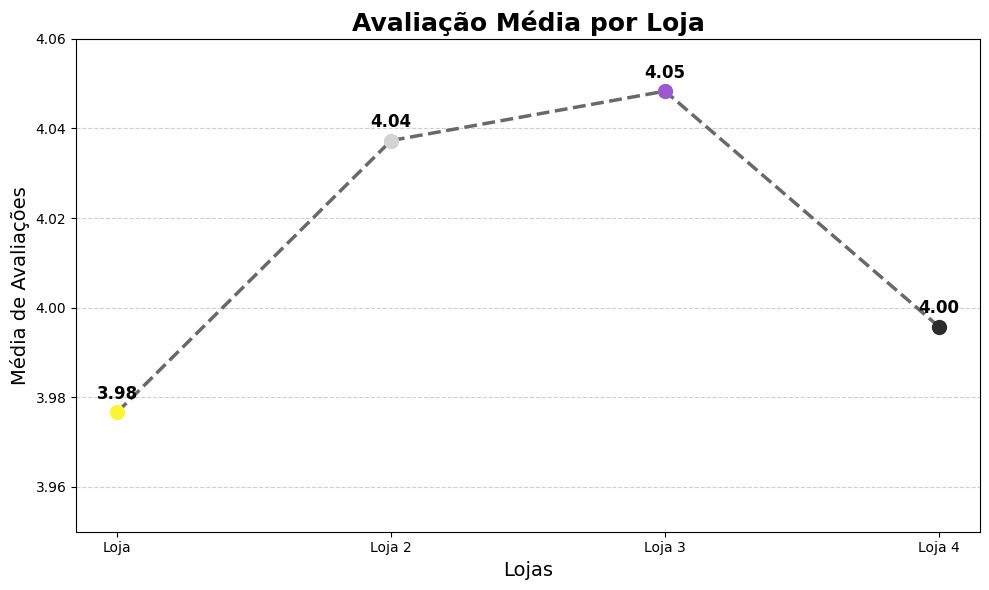

In [ ]:
# Dados
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.976685, 4.037304, 4.048326, 3.995759]
cores =[cor_loja1, cor_loja2 , cor_loja3, cor_loja4]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(lojas, medias, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(lojas)):
    plt.scatter(lojas[i], medias[i], color=cores[i], s=100, zorder=3)
    plt.text(lojas[i], medias[i] + 0.003, f"{medias[i]:.2f}", ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

# 4. Produtos Mais e Menos Vendidos
---
**Todas as Lojas possuem seu maior item vendido como "Móveis"**

seus itens menos vendidos variam por :

**Loja 1** - Utensílios Domésticos

**Loja 2** - Utensílios Domésticos

**Loja 3** - Utensílios Domésticos e Instrumentos Musicais

**Loja 4** - Instrumentos Musicais

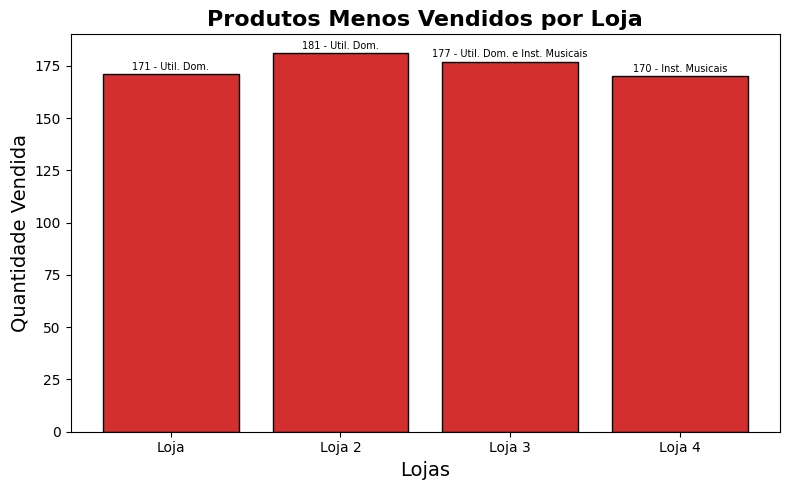

In [ ]:
# Dados
dados_menos_vendidos = pd.DataFrame({
    'Produto': ['Util. Dom.', 'Util. Dom.',
                'Util. Dom. e Inst. Musicais',
                'Inst. Musicais'],  # Produtos menos vendidos
    'Quantidade': [171, 181, 177, 170]  # Quantidades
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Criando o gráfico com vermelho mais elegante
plt.figure(figsize=(8, 5))
plt.bar(dados_menos_vendidos.index, dados_menos_vendidos['Quantidade'], color='#d32f2f', edgecolor='black')

# Adicionar rótulos detalhados e organizados
for i, (produto, quantidade) in enumerate(zip(dados_menos_vendidos['Produto'], dados_menos_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} - {produto}", ha='center', fontsize=7)

# Configurar título e rótulos
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
# Loja 1
produtos_mais_vendidos_loja1 = loja1['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 1 (por frequência):\n", produtos_mais_vendidos_loja1)
produtos_menos_vendidos_loja1 = loja1['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 1 (por frequência):\n", produtos_menos_vendidos_loja1)

# Loja 2
produtos_mais_vendidos_loja2 = loja2['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 2 (por frequência):\n", produtos_mais_vendidos_loja2)
produtos_menos_vendidos_loja2 = loja2['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 2 (por frequência):\n", produtos_menos_vendidos_loja2)

# Loja 3
produtos_mais_vendidos_loja3 = loja3['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 3 (por frequência):\n", produtos_mais_vendidos_loja3)
produtos_menos_vendidos_loja3 = loja3['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 3 (por frequência):\n", produtos_menos_vendidos_loja3)

# Loja 4
produtos_mais_vendidos_loja4 = loja4['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 4 (por frequência):\n", produtos_mais_vendidos_loja4)
produtos_menos_vendidos_loja4 = loja4['Produto'].value_counts().nsmallest(5)


Top 5 Produtos Mais Vendidos - Loja 1 (por frequência):
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos - Loja 1 (por frequência):
 Produto
Headset              33
Celular ABXY         33
Panela de pressão    35
Pandeiro             36
Mochila              39
Name: count, dtype: int64

Top 5 Produtos Mais Vendidos - Loja 2 (por frequência):
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos - Loja 2 (por frequência):
 Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Poltrona             35
Fone de ouvido       37
Name: count, dtype: int64

Top 5 Produtos Mais Vendidos - Loja 3 (por frequência):
 Produto
Kit banquetas      57
Mesa de jantar     56


# 5. Frete Médio por Loja
**Loja 1** : Possui os **custos logísticos mais altos**, tanto no total quanto no frete médio. Isso pode refletir **um grande volume de vendas**, mas também **possíveis ineficiências na distribuição** ou uma **proporção maior de pedidos de menor valor**, fazendo com que o frete pese mais no custo final.  

**Loja 2**: Seus **custos são um pouco menores** que os da Loja 1, indicando um **volume de vendas parecido**, mas com uma **gestão logística ligeiramente mais eficiente** – seja por melhor negociação com transportadoras, estratégia de envios ou outros fatores operacionais.  

**Loja 3**: Destaque em **eficiência logística**: tem o **menor frete médio entre as principais lojas**, sugerindo **melhor planejamento de rotas, pedidos com maior valor agregado ou localização estratégica** perto de seus clientes.  

**Loja 4**: Embora tenha os **fretes mais baratos** (em total e média), isso parece estar mais ligado ao **baixo volume de vendas** do que a uma operação otimizada. Ou seja, **seus custos são menores porque vende menos**, não necessariamente por ter uma logística superior.  

In [ ]:
# Calculando o frete médio para cada loja
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Criando um DataFrame para exibir os resultados de forma organizada
data_frete_medio = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
}

df_frete_medio = pd.DataFrame(data_frete_medio)
import pandas as pd

# Calculando o frete médio para cada loja
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Criando um DataFrame para exibir os resultados de forma organizada
data_frete_medio = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
}

df_frete_medio = pd.DataFrame(data_frete_medio)

print("Frete Médio por Loja:")
print(df_frete_medio.to_string(float_format="{:.2f}".format))

Frete Médio por Loja:
     Loja  Frete Médio
0  Loja 1        34.69
1  Loja 2        33.62
2  Loja 3        33.07
3  Loja 4        31.28


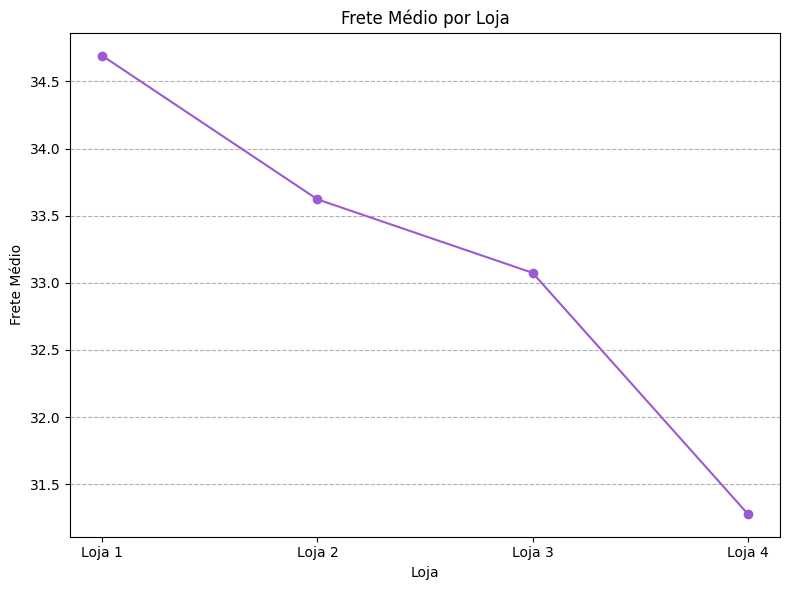

In [ ]:
# Criando um gráfico de linhas para o frete médio por loja
plt.figure(figsize=(8, 6))
plt.plot(df_frete_medio['Loja'], df_frete_medio['Frete Médio'], marker='o', linestyle='-', color= cor_loja3)
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.title('Frete Médio por Loja')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
total_vendas_loja1 = loja1['Preço'].sum()
total_vendas_loja2 = loja2['Preço'].sum()
total_vendas_loja3 = loja3['Preço'].sum()
total_vendas_loja4 = loja4['Preço'].sum()

def calcular_vendas_por_local_com_total(df, nome_loja, total_vendas):
    vendas_por_local = df.groupby('Local da compra')['Preço'].sum().reset_index()
    vendas_por_local['Loja'] = nome_loja
    vendas_por_local['Total Vendas Loja'] = total_vendas
    vendas_por_local.rename(columns={'Preço': 'Total Vendas Local'}, inplace=True)
    return vendas_por_local

# Calculando as vendas por 'Local da compra' com o total de vendas da loja
vendas_local_loja1 = calcular_vendas_por_local_com_total(loja1, 'Loja 1', total_vendas_loja1)
vendas_local_loja2 = calcular_vendas_por_local_com_total(loja2, 'Loja 2', total_vendas_loja2)
vendas_local_loja3 = calcular_vendas_por_local_com_total(loja3, 'Loja 3', total_vendas_loja3)
vendas_local_loja4 = calcular_vendas_por_local_com_total(loja4, 'Loja 4', total_vendas_loja4)

# Concatenando os resultados de todas as lojas em um único DataFrame
vendas_por_local_todas_lojas = pd.concat([vendas_local_loja1, vendas_local_loja2, vendas_local_loja3, vendas_local_loja4], ignore_index=True)

# Pivotando a tabela para ter o formato desejado
tabela_pivot = vendas_por_local_todas_lojas.pivot_table(
    index='Local da compra',
    columns='Loja',
    values='Total Vendas Local',
    fill_value=0
)

# Criando uma nova linha para o total de vendas das lojas
total_linha = pd.Series({
    'Loja 1': total_vendas_loja1,
    'Loja 2': total_vendas_loja2,
    'Loja 3': total_vendas_loja3,
    'Loja 4': total_vendas_loja4
}, name='Total')

# Adicionando a linha de total ao DataFrame pivotado
tabela_pivot = pd.concat([pd.DataFrame([total_linha]), tabela_pivot])

# Resetando o índice para ter 'Local da compra' como uma coluna novamente
tabela_pivot.reset_index(inplace=True)
tabela_pivot.rename(columns={'index': 'Local da compra'}, inplace=True)

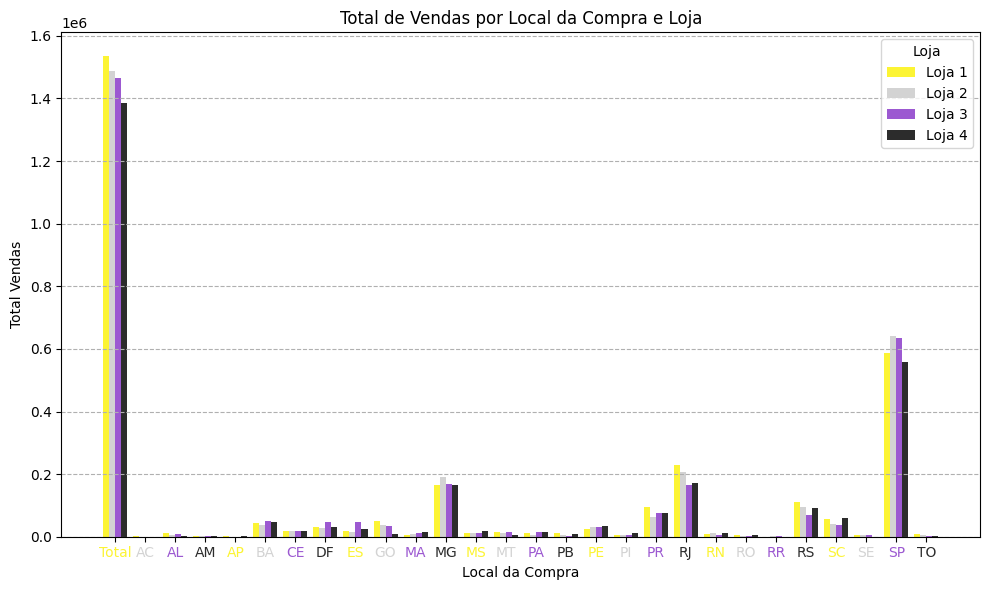

In [ ]:
# Definindo os locais de compra e as lojas
locais_compra = tabela_pivot['Local da compra']
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(locais_compra))

for i, loja in enumerate(lojas):
    ax.bar([pos + i * bar_width for pos in index], tabela_pivot[loja], bar_width, label=loja, color=cores[i])

# Adicionando rótulos e título
ax.set_xlabel('Local da Compra')
ax.set_ylabel('Total Vendas')
ax.set_title('Total de Vendas por Local da Compra e Loja')
ax.set_xticks([pos + bar_width * (len(lojas) - 1) / 2 for pos in index])
ax.set_xticklabels(locais_compra)
ax.legend(title='Loja')
ax.grid(axis='y', linestyle='--')

# Colorindo os xticks
for i, ticklabel in enumerate(ax.get_xticklabels()):
    ticklabel.set_color(cores[i % len(cores)])

plt.tight_layout()
plt.show()

# 📌 **Conclusão Estratégica: Recomendação para Venda de Loja**

Após uma análise detalhada do desempenho das quatro lojas da Alura Store — considerando faturamento, custos logísticos, satisfação dos clientes, diversidade de produtos e presença geográfica —, a **melhor decisão estratégica** é a venda da **Loja 4**.  

**🔍 Por que a Loja 4?**  
- **Faturamento mais baixo**: Revenue significativamente inferior, mesmo com volume de pedidos próximo às demais.  
- **Satisfação abaixo da média**: Avaliações menos favoráveis, indicando menor fidelização e experiência do cliente.  
- **Logística pouco eficiente**: Frete médio alto, apesar de sua localização (Centro-Oeste/Sudeste), sugerindo oportunidades não aproveitadas.  
- **Baixo impacto geográfico**: Suas localizações repetem áreas já cobertas por outras unidades, sem expandir o mercado.  
- **Desempenho fraco em categorias estratégicas**: Pouca relevância nos produtos mais rentáveis da rede.  

**💎 Por que manter as outras lojas?**  
- **Loja 1**: Alto faturamento e avaliações positivas, com presença em polos importantes como São Paulo e Belo Horizonte.  
- **Loja 2**: Equilíbrio entre custos e receita, além de forte atuação no Sul e Sudeste, regiões com infraestrutura consolidada.  
- **Loja 3**: Destaque em faturamento e satisfação, com alcance no Nordeste e Sudeste, além de excelente performance em categorias premium.  

**🎯 Conclusão Final**  
A **Loja 4** é a unidade que menos agrega ao negócio, com resultados inferiores em critérios financeiros, operacionais e estratégicos. Sua venda permitirá ao **Senhor João** realocar recursos para iniciativas mais promissoras, otimizando a saúde financeira e a expansão da marca.  

**✨ Dados que embasam a decisão:**  
- **Menor faturamento**: Loja 4 (R$ 1.384.497,58).

- **Avaliação mais baixa**: Loja 1 (3.98) mas com compensação em outros indicadores.

- **Frete mais caro**: Loja 1 (R$ 34.69), porém com retorno financeiro justificado.
  
- **Inconsistência e menor alcance**: Loja 4 lidera negativamente nesses aspectos.  

**✅ Recomendação:**  
Focar na venda da **Loja 4** assegura um futuro mais sólido para a Alura Store, priorizando unidades que combinam **rentabilidade, satisfação do cliente e potencial de crescimento**.  
